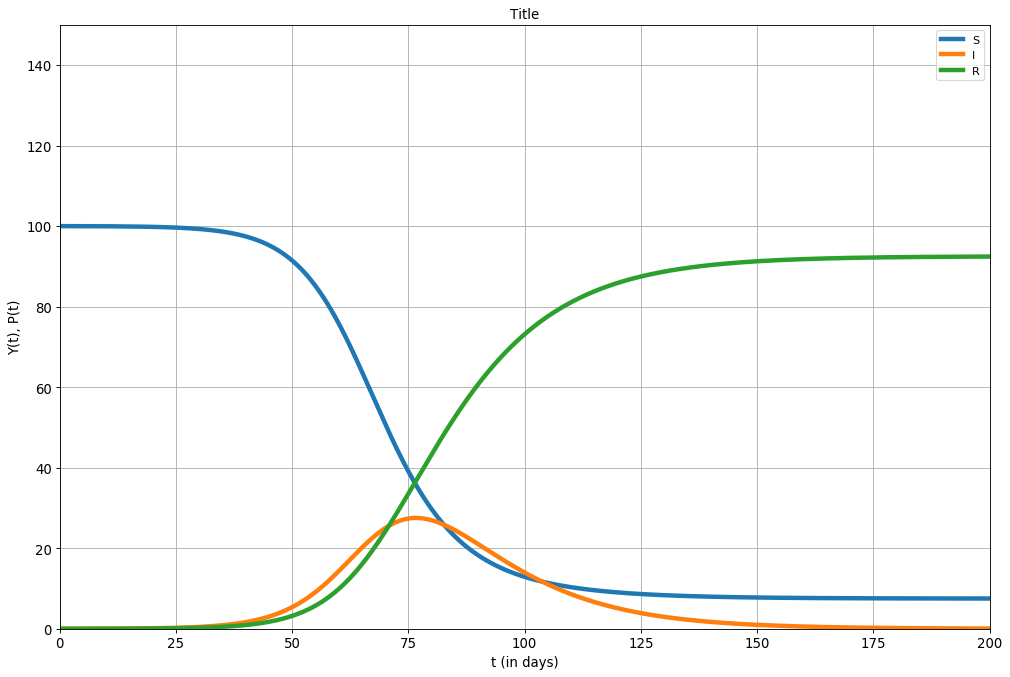

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

Dt = 0.01               # timestep Delta t
 
S_start=100 #healthy but can be infected 
I_start=0.01 #infectious
R_start=0 #recovered

N=S_start+I_start+R_start
#mu 
# beta is avg contact and gamma - recovery rate, gamma is kinda fixed

beta,gamma= 0.2,1/14
            
t_start = 0             # starttime
t_end = 200              # endtime
n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps


S_arr = np.zeros(n_steps +1)
I_arr = np.zeros(n_steps +1)
R_arr=np.zeros(n_steps +1)

t_arr = np.zeros(n_steps + 1) 

t_arr[0] = t_start    

S_arr[0] =S_start   
I_arr[0]=I_start
R_arr[0]=R_start


# Euler's method
for i in range (1, n_steps + 1):  
       
        S = S_arr[i-1]
        I = I_arr[i-1]
        R = R_arr[i-1]
        t = t_arr[i-1]
        
        dSdt = -beta*I*S/N          # calculate the derivative of 
        dIdt=beta*I*S/N -gamma*I
        dRdt=gamma*I
        #dRdt=-dSdt-dEdt-dIdt
        
        S_arr[i] = S + Dt*dSdt  # calc.  at next timestep,add to array
        I_arr[i] = I + Dt*dIdt
        R_arr[i] = R + Dt*dRdt
        t_arr[i] = t + Dt       # add new value of t to array
        
# plotting the result
fig = plt.figure(figsize=(15, 10), dpi=80)                                  # create figure
plt.plot(t_arr, S_arr, linewidth = 4, label = 'S')    # plot Y to t 

plt.plot(t_arr, I_arr, linewidth = 4, label = 'I') 
plt.plot(t_arr, R_arr, linewidth = 4, label = 'R') 
plt.title('Title', fontsize = 12)    
plt.xlabel('t (in days)', fontsize = 12)
plt.ylabel('Y(t), P(t)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)                        # show grid
plt.axis([t_start, t_end, 0, 150])     # show axes measures
plt.legend()
plt.show()


In [3]:
def get_inf(beta,scale,duration, gamma = 1/14):
    Dt = 0.01               # timestep Delta t
    S_start=99.9 #healthy but can be infected 
    I_start=0.01 #infectious
    R_start=0 #recovered

    N=S_start+I_start+R_start
    #mu 
    # beta is avg contact and gamma - recovery rate, gamma is kinda fixed


    t_start = 0#loc    
    t_end = duration #+loc             endtime
    n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps


    S_arr = np.zeros(n_steps +1)
    I_arr = np.zeros(n_steps +1)
    R_arr=np.zeros(n_steps +1)

    t_arr = np.zeros(n_steps + 1) 

    t_arr[0] = t_start    

    S_arr[0] =S_start   
    I_arr[0]=I_start
    R_arr[0]=R_start


    # Euler's method
    for i in range (1, n_steps + 1):  

            S = S_arr[i-1]
            I = I_arr[i-1]
            R = R_arr[i-1]
            t = t_arr[i-1]

            dSdt = -beta*I*S/N          # calculate the derivative of 
            dIdt=beta*I*S/N -gamma*I
            dRdt=gamma*I
            #dRdt=-dSdt-dEdt-dIdt

            S_arr[i] = S + Dt*dSdt  # calc.  at next timestep,add to array
            I_arr[i] = I + Dt*dIdt
            R_arr[i] = R + Dt*dRdt
            t_arr[i] = t + Dt   # add new value of t to array
            
          
    return I_arr*scale

In [4]:
def movavg(data):
    return [np.mean(data[i-7:i]) for i in range(7,len(data))]

In [5]:

df = pd.read_csv(r"C:\Users\Dima\Downloads\WHO-COVID-19-global-data.csv")
df
sweden = df[df['Country']=='Sweden']

sweden

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
94915,2020-01-03,SE,Sweden,EURO,0,0,0,0
94916,2020-01-04,SE,Sweden,EURO,0,0,0,0
94917,2020-01-05,SE,Sweden,EURO,0,0,0,0
94918,2020-01-06,SE,Sweden,EURO,0,0,0,0
94919,2020-01-07,SE,Sweden,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
95373,2021-04-05,SE,Sweden,EURO,3408,830428,3,13585
95374,2021-04-06,SE,Sweden,EURO,1450,831878,1,13586
95375,2021-04-07,SE,Sweden,EURO,3114,834992,6,13592
95376,2021-04-08,SE,Sweden,EURO,6817,841809,2,13594


# That's a bit fucked up because we kinda don't have explanattory variables So we do $y = f(\beta)+\epsilon$, where $f(\beta)$ set of points of infected people for possible set of parameteres. And y is the actual number of infected people, and well, we'll just minimise SSR over $\beta$. We dont estime $\gamma$ - because it's known

In [143]:
def get_SSR(x):
    beta = x[0]
    scale = x[1]
    start = x[2]
    end=x[3]
    cases = sweden['New_cases'][int(start):int(end)].values
    
    cases = list(map(lambda x: x/(max(cases)-min(cases)) , cases ))

    num_inf = movavg(cases) #maybe allow for moving dates 
    theory_num = get_inf(beta=beta,scale=scale,duration=len(num_inf), gamma = 1/14)
    theory_num=theory_num[::100][1:]
   
    return  (np.sum([(num_inf[i]-theory_num[i])**2 for i in range(len(num_inf))]))

In [136]:
start_values = [190,200]
end_values = [400,410]


In [163]:
from scipy.optimize import minimize
from scipy.optimize import Bounds


bounds = Bounds((0, 0, start_values[0], end_values[1] ), (1.0, 0.09, start_values[1],end_values[1]))
result = minimize(get_SSR, x0=[0.3,5,(start_values[0]+start_values[1])/2,(end_values[0]+end_values[1])/2],method='L-BFGS-B', bounds = bounds)
result

      fun: 0.2677356028616338
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.83025689, 5.36085614, 0.        , 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 11
   status: 0
  success: True
        x: array([1.29742533e-01, 4.80913224e-02, 1.95000000e+02, 4.10000000e+02])

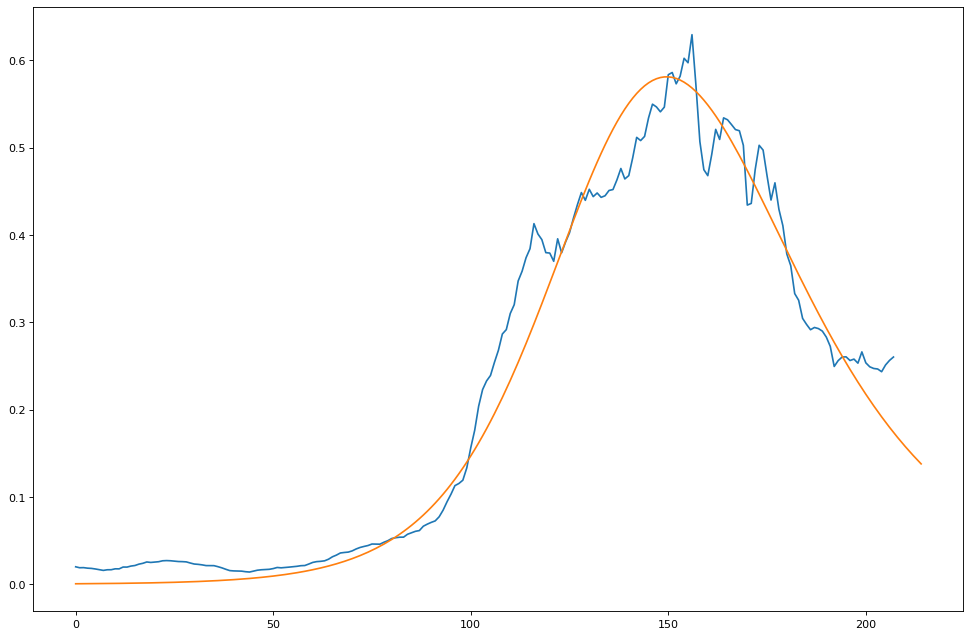

In [164]:
fig = plt.figure(figsize=(15, 10), dpi=80) 


opt_param = result['x']

cases = sweden['New_cases'][int(opt_param[2]):int(opt_param[3])].values
cases = list(map(lambda x: x/(max(cases)-min(cases)) , cases ))

plt.plot(range(len(movavg(cases))) ,movavg(cases))

theory_num = get_inf(beta=opt_param[0],scale=opt_param[1],duration=-int(opt_param[2])+int(opt_param[3]))
x=theory_num[::100][1:]

plt.plot(x)

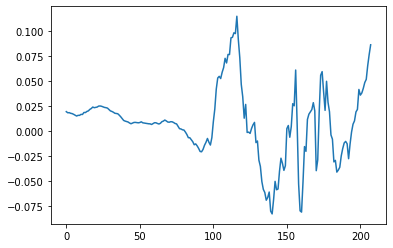

In [165]:
residuals = [(movavg(cases)[i] - x[i]) for i in range(len(movavg(cases)))]
plt.plot(residuals)

# we'll use goodnness as fit indicator (becase we minimes it and so it's the mist natural choice). $Goodness of fit = \frac{\sum (\hat y_i -y_i)^2} {y_i ^2} $

In [174]:
mse = 1/(len(residuals)) * np.sum([i**2 for i in residuals])
print(mse)
pearson_chisq= np.sum([((movavg(cases)[i] - x[i])/ movavg(cases)[i])**2 for i in range(len(movavg(cases)))])
pearson_chisq

0.0012871903983732395


41.48194109229485

In [177]:
GTest = 2* np.sum([movavg(cases)[i]*np.log(movavg(cases)[i]/x[i]) for i in range(len(movavg(cases)))])
GTest

7.21616476533595

In [3]:
import scipy.stats
scipy.stats.chi2.ppf(0.95, 3)

7.814727903251179

1. Estimate parameters, 
Use a model that forecasting growth and compare to actual growth to see the difference
So we valide this model on parts with where measures were not introduced, see it works, try to predict parts where measures introduced and see if we get higher estimates than actual data